# Results:

This notebook is used to analyze the results of the tests.

First, a few imports and global variables:

In [1]:
import pandas as pd
import json
import seaborn as sns
RESULTS_PATH = './results/'
TESTS = ['test_1']
EXTENSION = '.json'

# Test 1:

We extract the data in json to a pandas dataframe with the first experiment results:

In [2]:
with open(RESULTS_PATH + TESTS[0] + EXTENSION) as f:
    test_1 = json.load(f)['test_1']
df_t1 = pd.DataFrame(test_1)
# Replace -1e9 in best_fit for +1e9 in order to compute the score:
df_t1['best_fit'] = df_t1['best_fit'].replace(-1_000_000, 1_000_000)
# Print the first rows:
df_t1.head(None)
# Drop where function = HolderTableFunction:
df_t1 = df_t1[df_t1['function'] != 'HolderTableFunction']

We compute the scores based on the performance of the best algorithm in each dimension and function:

Now, we compute the score of performance for each dimension and function:

The score of the algorithm respect to the dimension and function is 0 if in minimum and 1 if in maximum, in linear scale.

In [3]:
df = df_t1
# Calculate the minimum and maximum fitness for each algorithm, function, and dimension group
grouped = df.groupby(['algorithm', 'function', 'dimension'])['best_fit']
min_fitness = grouped.min().groupby(['algorithm', 'function']).min()
max_fitness = grouped.max().groupby(['algorithm', 'function']).max()
# Merge the calculated minimum and maximum fitness back to the original DataFrame
df = df.merge(min_fitness, on=['algorithm', 'function'], suffixes=('', '_min'))
df = df.merge(max_fitness, on=['algorithm', 'function'], suffixes=('', '_max'))
# Calculate the score using the provided formula
df['score'] = 1 - (df['best_fit'] - df['best_fit_min']) / (df['best_fit_max'] - df['best_fit_min'])
# Drop the redundant columns if needed
df.drop(['best_fit_min', 'best_fit_max'], axis=1, inplace=True)
# Export as csv:
df.to_csv('./results/test_1.csv', index=False)

We get the results according to the dimension and function by terms of means and plot the results in seaborn as a line plot:

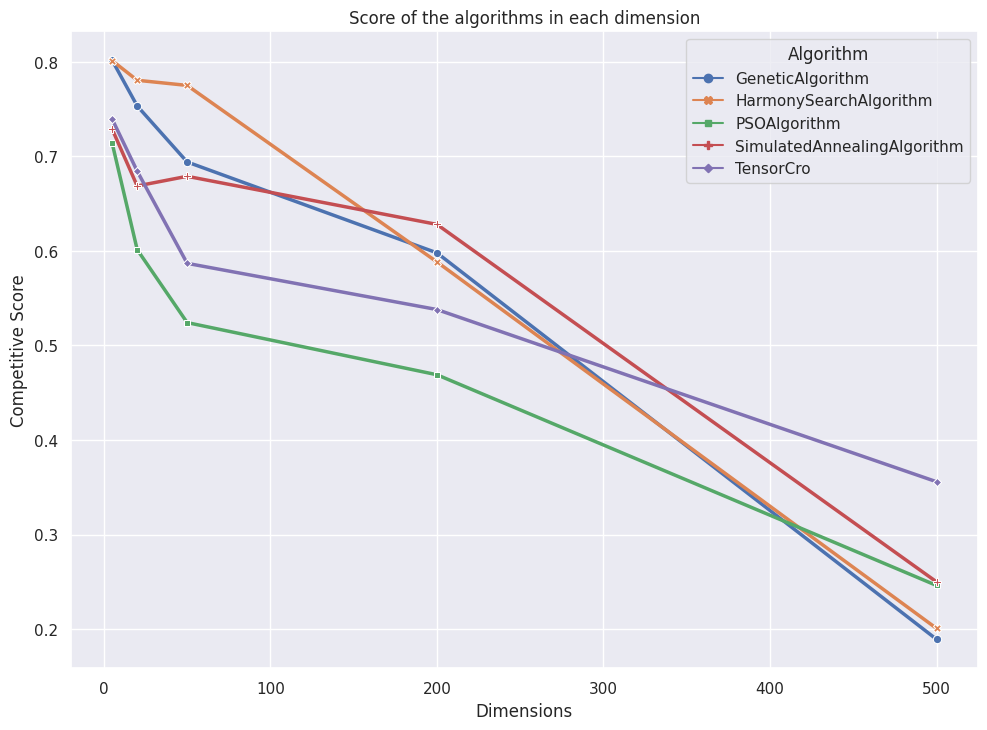

In [6]:
new_df = df.groupby(['algorithm', 'dimension']).mean(numeric_only=True)
new_df.reset_index(inplace=True)
new_df.head(None)

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig = sns.lineplot(data=new_df, x="dimension", y="score", hue="algorithm", style="algorithm", markers=True, dashes=False, linewidth=2.5)
# Labels of the sns plot:
fig.set(xlabel='Dimensions', ylabel='Competitive Score')
fig.set_title('Score of the algorithms in each dimension')
fig.legend(title='Algorithm')
fig.figure.savefig('./results/test_1.png')